# MUSHROOM DATA CLASSIFICATION

# LOADING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


# EXPLORATORY DATA ANALYSIS

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### CHECKING THE BALANCE OF THE TARGET CLASS

<Axes: xlabel='count', ylabel='class'>

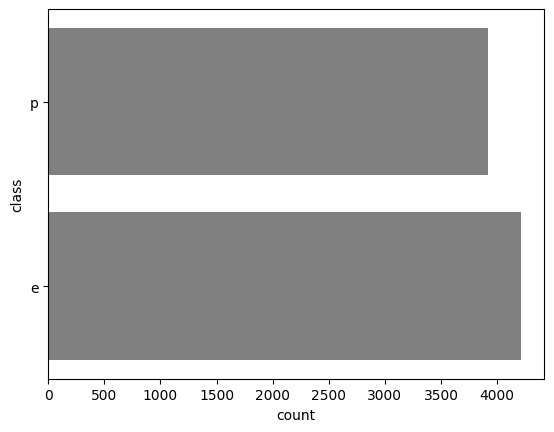

In [6]:
sns.countplot(df['class'],color='grey')

The balance between p and e in target class is almost equally balanced.

#### Checking for null values

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We have no missing values in the data.

#### Checking for duplicate values.

In [8]:
df.duplicated().sum()

0

We have no duplicate value in the data.

#### Observations: 
1. We have no missing and duplicate values in our data.
2. The balance of target class is almost equal.
3. We only have three ordinal columns: gill-spacing, gill-size and ring-number.
4. veil-type has only 1 unique value which is redundant in this data.

# DATA PRE-PROCESSING

#### Dropping veil-type column (redundant).

In [9]:
df.drop('veil-type',axis=1,inplace=True)

#### Mapping the ordinal features

In [10]:
gs_map = {
    'c' : 0,
    'w' : 1,
    'd' : 2
}

gsize_map = {
    'b' : 0,
    'n' : 1
}

rn_map = {
    'n' : 0,
    'o' : 1,
    't' : 2
}

In [11]:
df['ring-number'] = df['ring-number'].map(rn_map)
df['gill-spacing'] = df['gill-spacing'].map(gs_map)
df['gill-size'] = df['gill-size'].map(gsize_map)

#### Making dummies for nominal feeatures

In [12]:
dummy_cols = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-type',
       'spore-print-color', 'population', 'habitat']

In [13]:
main_df = pd.get_dummies(df[dummy_cols])

In [14]:
main_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


#### Integrating the ordinal features and target col into the main df

In [15]:
main_df['class'] = df['class'].map({'e':0,'p':1})

In [16]:
main_df['gill-spacing'] = df['gill-spacing']
main_df['gill-size'] = df['gill-size']
main_df['ring-number'] = df['ring-number']

# SPLITTING THE DATA INTO TRAIN AND TEST AND FITTING THE MODEL

In [17]:
X = main_df.drop('class',axis=1)
y = main_df['class']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Logistic Regression

In [20]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [21]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       828\n           1       1.00      1.00      1.00       797\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [22]:
confusion_matrix(y_test,y_pred)

array([[828,   0],
       [  0, 797]])

## Random Forest

In [23]:
rf = RandomForestClassifier()
model_rf = rf.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00       797

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625




[[828   0]
 [  0 797]]


## catboost

In [24]:
cb = CatBoostClassifier()
model_rf = cb.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))

Learning rate set to 0.02291
0:	learn: 0.6296496	total: 59.6ms	remaining: 59.6s
1:	learn: 0.5735013	total: 61.2ms	remaining: 30.6s
2:	learn: 0.5398108	total: 62.2ms	remaining: 20.7s
3:	learn: 0.4813174	total: 63.8ms	remaining: 15.9s
4:	learn: 0.4324837	total: 65.3ms	remaining: 13s
5:	learn: 0.3903417	total: 66.7ms	remaining: 11.1s
6:	learn: 0.3524623	total: 68.2ms	remaining: 9.67s
7:	learn: 0.3160730	total: 70.2ms	remaining: 8.7s
8:	learn: 0.2846122	total: 71.6ms	remaining: 7.88s
9:	learn: 0.2527099	total: 73.1ms	remaining: 7.24s
10:	learn: 0.2311818	total: 74.5ms	remaining: 6.7s
11:	learn: 0.2114636	total: 75.9ms	remaining: 6.25s
12:	learn: 0.1920653	total: 77.3ms	remaining: 5.87s
13:	learn: 0.1735968	total: 78.7ms	remaining: 5.54s
14:	learn: 0.1561784	total: 80ms	remaining: 5.26s
15:	learn: 0.1459764	total: 81.4ms	remaining: 5.01s
16:	learn: 0.1336903	total: 82.9ms	remaining: 4.79s
17:	learn: 0.1209018	total: 84.6ms	remaining: 4.61s
18:	learn: 0.1118075	total: 86.1ms	remaining: 4.45s

# SUMMARY:
### Whatever model i use i am getting 100% accuracy and F1-score of 1.
#### The mushroom classification project used the UCI Mushroom dataset to predict whether mushrooms are edible or poisonous based on features like odor and cap shape. After thorough EDA, confirming no missing values and balanced classes, we preprocessed the data by dropping the redundant veil-type, mapping ordinal features, and one-hot encoding nominal ones. Multiple models, including Logistic Regression, achieved 100% accuracy and an F1-score of 1.0, indicating highly discriminative features and a clean dataset. This perfect performance highlights the dataset’s idealized nature, though real-world data may pose challenges.